In [48]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [49]:
df = pd.read_csv("/Users/lsergio/DS-SF-34/Practice/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [50]:
df.shape[0]

35168

In [10]:
len(df)

35168

In [11]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,35168.000000,35168.000000,0.0,31964.000000,31964.000000,31964.000000,31964.000000,31964.000000,35168.000000
mean,2012.259554,2012.259554,NaN,30.987073,30.987073,26.800857,35.736685,4052.175072,29.794586
std,1.093346,1.093346,NaN,10.194991,10.194991,10.004145,11.151511,20562.426884,16.331180
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2011.000000,2011.000000,NaN,24.000000,24.000000,19.900000,28.000000,612.000000,17.000000
50%,2013.000000,2013.000000,NaN,30.500000,30.500000,26.300000,35.200000,1278.000000,30.000000
75%,2013.000000,2013.000000,NaN,36.800000,36.800000,32.800000,42.000000,2630.000000,44.000000
max,2014.000000,2014.000000,NaN,75.300000,75.300000,69.500000,87.700000,475078.000000,72.000000


In [12]:
df.corr()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
YearEnd,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
Data_Value_Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Data_Value_Alt,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Low_Confidence_Limit,-0.023281,-0.023281,NaN,0.956547,0.956547,1.000000,0.803165,0.048894,0.012092
High_Confidence_Limit,-0.035448,-0.035448,NaN,0.940731,0.940731,0.803165,1.000000,-0.062172,-0.027053
Sample_Size,-0.005367,-0.005367,NaN,-0.005266,-0.005266,0.048894,-0.062172,1.000000,0.172637
LocationID,0.021179,0.021179,NaN,-0.007376,-0.007376,0.012092,-0.027053,0.172637,1.000000


In [21]:
df.shape[1]

33

In [23]:
df[:2]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Gender,Male,GEN,MALE


In [26]:
for column in df.columns:
    print column

YearStart
YearEnd
LocationAbbr
LocationDesc
Datasource
Class
Topic
Question
Data_Value_Unit
Data_Value_Type
Data_Value
Data_Value_Alt
Data_Value_Footnote_Symbol
Data_Value_Footnote
Low_Confidence_Limit
High_Confidence_Limit 
Sample_Size
Total
Age(years)
Education
Gender
Income
Race/Ethnicity
GeoLocation
ClassID
TopicID
QuestionID
DataValueTypeID
LocationID
StratificationCategory1
Stratification1
StratificationCategoryId1
StratificationID1


In [27]:
df[:10]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,High school graduate,EDU,EDUHSGRAD
5,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,Some college or technical school,EDU,EDUCOTEC
6,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,College graduate,EDU,EDUCOGRAD
7,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Age (years),18 - 24,AGEYR,AGEYR1824
8,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Age (years),25 - 34,AGEYR,AGEYR2534
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Age (years),35 - 44,AGEYR,AGEYR3544


In [28]:
df.tail(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
35166,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
35167,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,Other,RACE,RACEOTH


In [29]:
df[]

KeyError: 'California'

In [32]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,...,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...
35163,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,Asian,RACE,RACEASN
35164,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
35165,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
35166,2014,2014,WY,Wyoming,Behavioral Risk Factor Surveillance System,...,56,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


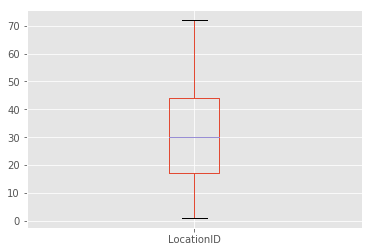

In [37]:
df[ ['LocationID'] ].plot(kind = 'box')

TypeError: cannot concatenate 'str' and 'float' objects

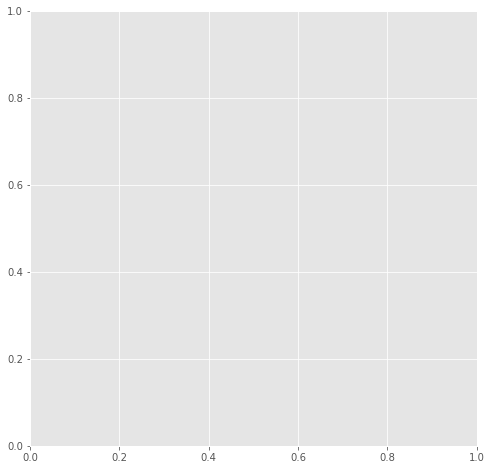

In [40]:
df.Gender.hist(figsize = (8, 8))

In [41]:
df.mode()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2013.0,2013.0,AK,Alabama,Behavioral Risk Factor Surveillance System,...,1,Race/Ethnicity,"$15,000 - $24,999",RACE,AGEYR1824
1,NaN,NaN,AL,Alaska,NaN,...,2,NaN,"$25,000 - $34,999",NaN,AGEYR2534
2,NaN,NaN,AR,Arizona,NaN,...,4,NaN,"$35,000 - $49,999",NaN,AGEYR3544
3,NaN,NaN,AZ,Arkansas,NaN,...,5,NaN,"$50,000 - $74,999",NaN,AGEYR4554
4,NaN,NaN,CA,California,NaN,...,6,NaN,"$75,000 or greater",NaN,AGEYR5564
...,...,...,...,...,...,...,...,...,...,...,...
47,NaN,NaN,VT,Virginia,NaN,...,53,NaN,NaN,NaN,NaN
48,NaN,NaN,WA,Washington,NaN,...,54,NaN,NaN,NaN,NaN
49,NaN,NaN,WI,West Virginia,NaN,...,55,NaN,NaN,NaN,NaN
50,NaN,NaN,WV,Wisconsin,NaN,...,56,NaN,NaN,NaN,NaN


In [52]:
df.Stratification1.mode()

0                    $15,000 - $24,999
1                    $25,000 - $34,999
2                    $35,000 - $49,999
3                    $50,000 - $74,999
4                   $75,000 or greater
5                              18 - 24
6                      2 or more races
7                              25 - 34
8                              35 - 44
9                              45 - 54
                    ...               
18                High school graduate
19                            Hispanic
20                   Less than $15,000
21               Less than high school
22                                Male
23                  Non-Hispanic Black
24                  Non-Hispanic White
25                               Other
26    Some college or technical school
27                               Total
dtype: object

In [57]:
df.isnull()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,...,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,False,False,False,False,False,...,False,False,False,False,False
1,False,False,False,False,False,...,False,False,False,False,False
2,False,False,False,False,False,...,False,False,False,False,False
3,False,False,False,False,False,...,False,False,False,False,False
4,False,False,False,False,False,...,False,False,False,False,False
5,False,False,False,False,False,...,False,False,False,False,False
6,False,False,False,False,False,...,False,False,False,False,False
7,False,False,False,False,False,...,False,False,False,False,False
8,False,False,False,False,False,...,False,False,False,False,False
9,False,False,False,False,False,...,False,False,False,False,False


In [58]:
df.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit              35168
Data_Value_Type                  0
                             ...  
GeoLocation                    672
ClassID                          0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
dtype: int64

In [59]:
df.isnull().sum().sum()

291628

In [60]:
corr = df.corr()

corr

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
YearEnd,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
Data_Value_Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Data_Value_Alt,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Low_Confidence_Limit,-0.023281,-0.023281,NaN,0.956547,0.956547,1.000000,0.803165,0.048894,0.012092
High_Confidence_Limit,-0.035448,-0.035448,NaN,0.940731,0.940731,0.803165,1.000000,-0.062172,-0.027053
Sample_Size,-0.005367,-0.005367,NaN,-0.005266,-0.005266,0.048894,-0.062172,1.000000,0.172637
LocationID,0.021179,0.021179,NaN,-0.007376,-0.007376,0.012092,-0.027053,0.172637,1.000000


In [61]:
list(corr.columns)

['YearStart',
 'YearEnd',
 'Data_Value_Unit',
 'Data_Value',
 'Data_Value_Alt',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Sample_Size',
 'LocationID']

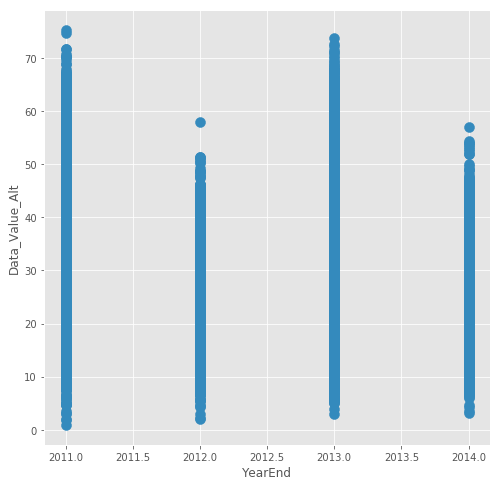

In [64]:
df.plot(kind = 'scatter', x = 'YearEnd', y = 'Data_Value_Alt', s = 100, figsize = (8, 8))

In [66]:
type(df)

pandas.core.frame.DataFrame

In [67]:
type(df.YearEnd)

pandas.core.series.Series

In [68]:
df.Gender.value_counts

<bound method Series.value_counts of 0           NaN
1          Male
2        Female
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
          ...  
35158       NaN
35159       NaN
35160       NaN
35161       NaN
35162       NaN
35163       NaN
35164       NaN
35165       NaN
35166       NaN
35167       NaN
Name: Gender, dtype: object>

In [74]:
df.corr()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
YearEnd,1.000000,1.000000,NaN,-0.029993,-0.029993,-0.023281,-0.035448,-0.005367,0.021179
Data_Value_Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Data_Value_Alt,-0.029993,-0.029993,NaN,1.000000,1.000000,0.956547,0.940731,-0.005266,-0.007376
Low_Confidence_Limit,-0.023281,-0.023281,NaN,0.956547,0.956547,1.000000,0.803165,0.048894,0.012092
High_Confidence_Limit,-0.035448,-0.035448,NaN,0.940731,0.940731,0.803165,1.000000,-0.062172,-0.027053
Sample_Size,-0.005367,-0.005367,NaN,-0.005266,-0.005266,0.048894,-0.062172,1.000000,0.172637
LocationID,0.021179,0.021179,NaN,-0.007376,-0.007376,0.012092,-0.027053,0.172637,1.000000


In [86]:
len(df.groupby(['Income']))

7

In [87]:
(df.Gender == 'Male').sum()

1256

In [88]:
(df.Gender == 'Female').sum()

1256

In [92]:
(df.Stratification1 == "$75,000 or greater").sum()


1256